In [2]:
# install.packages("nycflights13")
library(nycflights13)
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## [3.2.5 Exercises](https://r4ds.hadley.nz/data-transform#exercises)

### 1. In a single pipeline for each condition, find all flights that meet the condition:

- Had an arrival delay of two or more hours
- Flew to Houston (IAH or HOU)
- Were operated by United, American, or Delta
- Departed in summer (July, August, and September)
- Arrived more than two hours late but didn’t leave late
- Were delayed by at least an hour, but made up over 30 minutes in flight

In [3]:
flights |>
    filter(arr_delay >= 120)|>
glimpse()

flights |> 
    filter(dest %in% c("IAH", "HOU"))|>
glimpse()

flights |>
    filter(carrier %in% c("UA", "AA", "DL"))|>
glimpse()

flights |>
    filter(month %in% c(7,8,9))|>
glimpse()

flights|>
    filter(dep_delay <= 0 & arr_delay>120)|>
glimpse()

flights|>
    filter(dep_delay>=60 & arr_delay<=(dep_delay-30))|>
glimpse()

Rows: 10,200
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 811, 848, 957, 1114, 1505, 1525, 1549, 1558, 1732, 1803…
$ sched_dep_time <int> 630, 1835, 733, 900, 1310, 1340, 1445, 1359, 1630, 1620…
$ dep_delay      <dbl> 101, 853, 144, 134, 115, 105, 64, 119, 62, 103, 290, 26…
$ arr_time       <int> 1047, 1001, 1056, 1447, 1638, 1831, 1912, 1718, 2028, 2…
$ sched_arr_time <int> 830, 1950, 853, 1222, 1431, 1626, 1656, 1515, 1825, 175…
$ arr_delay      <dbl> 137, 851, 123, 145, 127, 125, 136, 123, 123, 138, 338, …
$ carrier        <chr> "MQ", "MQ", "UA", "UA", "EV", "B6", "EV", "EV", "EV", "…
$ flight         <int> 4576, 3944, 856, 1086, 4497, 525, 4181, 5712, 4092, 462…
$ tailnum        <chr> "N531MQ", "N942MQ", "N534UA", "N76502", "N17984", "N231…
$ origin       

### 2. Sort `flights` to find the flights with the longest departure delays. Find the flights that left earliest in the morning.

    Flights 51, 3535, and 3695 had the longest departure delays and Flights 22, 530, and 1503 left the earliest in the morning

In [4]:
ans <- flights|>
    arrange(desc(dep_delay))
ans[0:3,6:12]

ans<- flights|>
    arrange(dep_time)
ans[0:3,4:12]

dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum
<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>
1301,1242,1530,1272,HA,51,N384HA
1137,1607,2120,1127,MQ,3535,N504MQ
1126,1239,1810,1109,MQ,3695,N517MQ


dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>
1,2249,72,108,2357,71,B6,22,N206JB
1,2100,181,124,2225,179,WN,530,N550WN
1,2359,2,442,440,2,B6,1503,N627JB


### 3. Sort `flights` to find the fastest flights. (Hint: Try including a math calculation inside of your function.)

    The fastest flights were flights 1860, 1491 and 3608

In [5]:
ans <- flights |>
    arrange(desc(distance / air_time))

ans$mph <- ans$distance / (ans$air_time / 60)
ans[0:3, 11:20]

flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,mph
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
1499,N666DN,LGA,ATL,65,762,17,0,2013-05-25 17:00:00,703.3846
4667,N17196,EWR,MSP,93,1008,15,13,2013-07-02 15:00:00,650.3226
4292,N14568,EWR,GSP,55,594,20,25,2013-05-13 20:00:00,648.0000


### 4. Was there a flight on every day of 2013?

        yes because the distinct day month returns 365 rows which is the same number of days there were in the non-leap year that was 2013

In [6]:
flights |>
    filter(year == 2013) |>
    distinct(month, day) |>
glimpse()

Rows: 365
Columns: 2
$ month <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day   <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1…


### 5. Which flights traveled the farthest distance? Which traveled the least distance?

    Flights N391HA, N384HA, and N392HA travelled the farthest distance. Flights US 1632, N13989 and N14972 travelled the least distance. 

In [28]:
distances <- flights |>
    arrange(distance)
    
tail(distances, n = 3)[ , 10:12]
distances[0:3 , 10:12]


carrier,flight,tailnum
<chr>,<int>,<chr>
HA,51,N391HA
HA,51,N384HA
HA,51,N392HA


carrier,flight,tailnum
<chr>,<int>,<chr>
US,1632,NA
EV,3833,N13989
EV,4193,N14972


### 6. Does it matter what order you used `filter()`  and `arrange()` if you’re using both? Why/why not? Think about the results and how much work the functions would have to do. 
 
https://dplyr.tidyverse.org/reference/filter.html   

https://dplyr.tidyverse.org/reference/arrange.html 

    Filter would make a dataframe smaller before arranging whats left, if you are going to do both filter and arrange, filter should come first since it isn't going to change how arrange works other than making arrange work on less data. 

## [3.3.5 Exercises](https://r4ds.hadley.nz/data-transform#exercises-1)

### 1. Compare `dep_time`, `sched_dep_time`, and `dep_delay`. How would you expect those three numbers to be related?

    dep_time would be dep_delay away from sched_dep_time, some complications arise in showing this math when looking at times that conflict with the 24 hour mark of a day. 

In [8]:
# test<-flights
# test$help<-abs(test$dep_delay)%/%60*100+((abs(test$dep_delay))%%60)*test$dep_delay/abs(test$dep_delay)
# test$test<-test$sched_dep_time+test$help

# test$dept_time<-test$dep_time
# test$dept_delay<-test$dep_delay
# test$sched_dept_time<-test$sched_dep_time
# testa<-test[,20:23]
# testa|>
#     filter(test!=dept_time)
#     # filter(help!=abs(dept_delay))
test <- flights


test$test <-  -((test$sched_dep_time %/% 100) * 60 + (test$sched_dep_time %% 100) - ((test$dep_time %/% 100) * 60 + (test$dep_time %% 100)))
test$dept_delay <- test$dep_delay
test$sched_dept_time <- test$sched_dep_time
test$dept_time <- test$dep_time

testa <- test[ , 20:23]
testa

test,dept_delay,sched_dept_time,dept_time
<dbl>,<dbl>,<int>,<int>
2,2,515,517
4,4,529,533
2,2,540,542
-1,-1,545,544
-6,-6,600,554
-4,-4,558,554
-5,-5,600,555
-3,-3,600,557
-3,-3,600,557


### 2. Brainstorm as many ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

<!-- You could use filter or you could make a new dataframe using slices or idk what this question wants from me. technically this is an inside thought type question -->
    You can select() by the names of the columns or use slicing or where or other helper functions. 

### 3. What happens if you specify the name of the same variable multiple times in a `select()` call?

    nothing, it ignores it. i have seen somewhere that it adds another column with the same data if you are using a dataframe

In [9]:
flights |>
    select(dep_delay, dep_time, dep_delay)

dep_delay,dep_time
<dbl>,<int>
2,517
4,533
2,542
-1,544
-6,554
-4,554
-5,555
-3,557
-3,557


### 4. What does the `any_of()` function do? Why might it be helpful in conjunction with this vector?  
``` r
    variables <- c("year", "month", "day", "dep_delay", "arr_delay")

```

    any_of() allows you to make a list of variables and if any of them apply to the code where any_of() call is placed, then the code will execute based on the ones that are true. 

In [10]:
variables <- c("year", "month", "day", "dep_delay", "arr_delay", "f")
flights |>
    select(any_of(variables)) |>
glimpse()

Rows: 336,776
Columns: 5
$ year      <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, …
$ month     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ dep_delay <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1, 0, …
$ arr_delay <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -14, 31…


### 5. Does the result of running the following code surprise you? How do the select helpers deal with upper and lower case by default? How can you change that default?  

```r
    flights |> select(contains("TIME"))
```

    somehow this did "surprise" me as in i would've assumed that it was case sensitive, by default the helpers ignore case but to change this just specify as below...

In [11]:
flights |> select(contains("TIME")) |> glimpse()

flights |> 
    select(contains("TIME", ignore.case = FALSE)) |>
glimpse()

Rows: 336,776
Columns: 6
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ air_time       <dbl> 227, 227, 160, 183, 116, 150, 158, 53, 140, 138, 149, 1…
$ time_hour      <dttm> 2013-01-01 05:00:00, 2013-01-01 05:00:00, 2013-01-01 0…
Rows: 336,776
Columns: 0


### 6. Rename `air_time` to `air_time_min` to indicate units of measurement and move it to the beginning of the data frame.

In [12]:
flights |>
    rename(air_time_min = air_time) |>
    relocate(air_time_min, .before = 1) |>
glimpse()

Rows: 336,776
Columns: 19
$ air_time_min   <dbl> 227, 227, 160, 183, 116, 150, 158, 53, 140, 138, 149, 1…
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum     

### 7. Why doesn’t the following work, and what does the error mean?   

```r
        flights |> 
          select(tailnum) |> 
          arrange(arr_delay)
        #> Error in `arrange()`:
        #> ℹ In argument: `..1 = arr_delay`.
        #> Caused by error:
        #> ! object 'arr_delay' not found
```

    arrange needs to occur before select if you are going to remove the column that you are arranging by.

In [13]:
flights |> 
    select(tailnum) |> 
    arrange("arr_delay") |> 
        #doesn't work by the column 
glimpse()

flights |> 
    arrange(arr_delay) |>
    select(tailnum) |>
glimpse()

flights |> 
    select(tailnum, arr_delay) |> 
    arrange(arr_delay) |>
glimpse()
          

Rows: 336,776
Columns: 1
$ tailnum <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N39463", "N…
Rows: 336,776
Columns: 1
$ tailnum <chr> "N843VA", "N840VA", "N851UA", "N3KCAA", "N551AS", "N24212", "N…
Rows: 336,776
Columns: 2
$ tailnum   <chr> "N843VA", "N840VA", "N851UA", "N3KCAA", "N551AS", "N24212", …
$ arr_delay <dbl> -86, -79, -75, -75, -74, -73, -71, -71, -71, -70, -70, -70, …


## [3.5.7 Exercises](https://r4ds.hadley.nz/data-transform#groups)

### 1. Which carrier has the worst average delays? Challenge: can you disentangle the effects of bad airports vs. bad carriers? Why/why not? Hint: think about 
```r 
        flights |> group_by(carrier, dest) |> summarize(n())
```
 

In [29]:
# flights |> group_by(carrier, dest) |> summarize(n())
flights |>
    group_by(carrier, dest) |>
    summarize(
        n = n(),
        avg_delay = mean(dep_delay, na.rm = TRUE)
    )

flights |>
    group_by(dest) |>
    summarize(
        n = n(),
        avg_delay = mean(arr_delay - dep_delay, na.rm = TRUE)
    ) |>
    arrange(avg_delay / abs(n))

    
flights |> 
    group_by(carrier) |>
    summarize(avg_delay = mean(dep_delay, na.rm = TRUE)) |>
    arrange(avg_delay)


`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


carrier,dest,n,avg_delay
<chr>,<chr>,<int>,<dbl>
9E,ATL,59,0.9649123
9E,AUS,2,19.0000000
9E,AVL,10,-2.6000000
9E,BGR,1,34.0000000
9E,BNA,474,19.0925110
9E,BOS,914,14.7569767
9E,BTV,2,-4.5000000
9E,BUF,833,15.5081967
9E,BWI,856,17.4658537


dest,n,avg_delay
<chr>,<int>,<dbl>
LEX,1,-13.000000
ANC,8,-15.375000
SBN,10,-14.600000
MTJ,15,-15.857143
HDN,15,-10.142857
PSP,19,-9.777778
CHO,52,-11.891304
MYR,59,-11.155172
ILM,110,-14.532710


carrier,avg_delay
<chr>,<dbl>
US,3.782418
HA,4.900585
AS,5.804775
AA,8.586016
DL,9.264505
MQ,10.552041
UA,12.106073
OO,12.586207
VX,12.869421


### 2. Find the flights that are most delayed upon departure from each destination.

In [15]:
flights |>
    group_by(dest) |>
    slice_max(dep_delay, n = 1) |>
    summarize(flight, tailnum, dep_delay) |>
    arrange(desc(dep_delay))


dest,flight,tailnum,dep_delay
<chr>,<int>,<chr>,<dbl>
HNL,51,N384HA,1301
CMH,3535,N504MQ,1137
ORD,3695,N517MQ,1126
SFO,177,N338AA,1014
CVG,3075,N665MQ,1005
TPA,2391,N959DL,960
MSP,2119,N927DA,911
PDX,2007,N3762Y,899
ATL,2047,N6716C,898


### 3. How do delays vary over the course of the day? Illustrate your answer with a plot.

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'hour', 'minute'. You can override using
the `.groups` argument.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


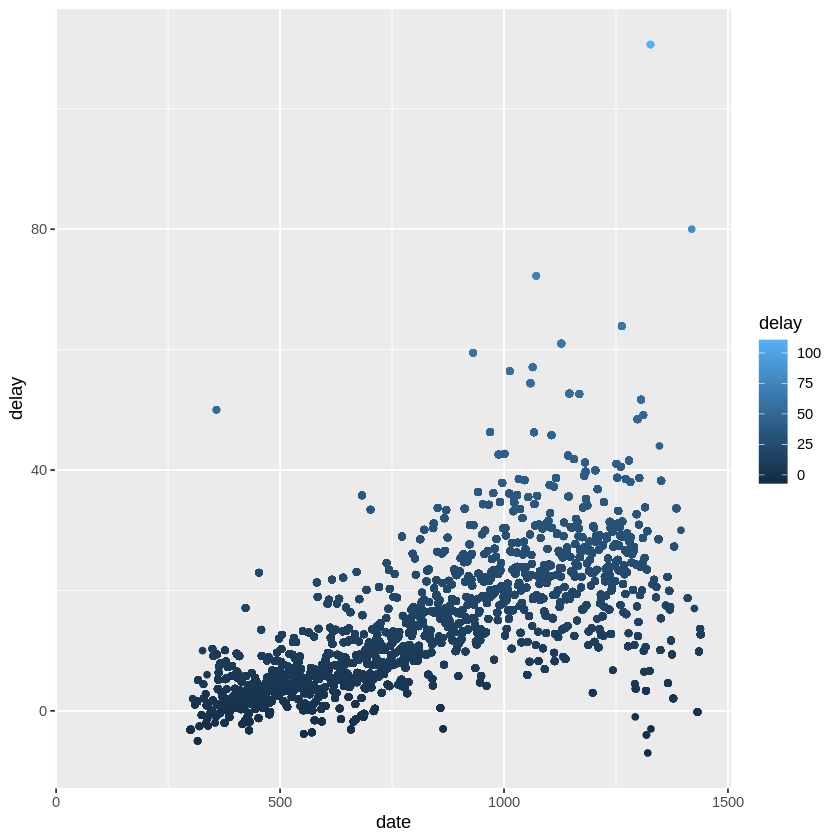

In [16]:
flights |>
    group_by(hour, minute) |>
    mutate(date = hour * 60 + minute) |>
    summarize(date, delay = mean(dep_delay, na.rm = TRUE)) |>
    ggplot(aes(x = date, y = delay, color = delay)) +
    geom_point()


### 4. What happens if you supply a negative `n` to `slice_min()` and friends?

    since n specifies how many rows to grab, a negative n would count from the number of rows in the dataframe - n ie if there are 20 rows and n is -9 then it would give the first 11 rows that are selected by the formula ie slice_min() the 11 lowest value rows

In [32]:
flights |>
    group_by(dest) |>
    slice_max(dep_delay, n = -1) |>
    summarize(flight, tailnum, dep_delay) |>
    arrange(desc(dep_delay))

flights |>
    group_by(dest) |>
    slice_min(dep_delay, n = -15) |>
    summarize(flight, tailnum, dep_delay) |>
    arrange(desc(dep_delay))
    
flights |>
    group_by(dest) |>
    slice_min(dep_delay, n = 1) |>
    summarize(flight, tailnum, dep_delay) |>
    arrange(desc(dep_delay))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'dest'. You can override using the
`.groups` argument.


dest,flight,tailnum,dep_delay
<chr>,<int>,<chr>,<dbl>
HNL,51,N384HA,1301
CMH,3535,N504MQ,1137
ORD,3695,N517MQ,1126
SFO,177,N338AA,1014
CVG,3075,N665MQ,1005
TPA,2391,N959DL,960
MSP,2119,N927DA,911
PDX,2007,N3762Y,899
ATL,2047,N6716C,898


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'dest'. You can override using the
`.groups` argument.


dest,flight,tailnum,dep_delay
<chr>,<int>,<chr>,<dbl>
CMH,3535,N504MQ,1137
ORD,3695,N517MQ,1126
SFO,177,N338AA,1014
CVG,3075,N665MQ,1005
TPA,2391,N959DL,960
MSP,2119,N927DA,911
ATL,2047,N6716C,898
MIA,172,N5DMAA,896
ORD,3744,N523MQ,878


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'dest'. You can override using the
`.groups` argument.


dest,flight,tailnum,dep_delay
<chr>,<int>,<chr>,<dbl>
ANC,887,N559UA,-2
MTJ,486,N527UA,-3
HDN,441,N841UA,-5
SBN,6067,N12157,-7
LEX,3669,N8604C,-9
CAE,4278,N15983,-10
OAK,91,N746JB,-10
PSP,55,N841VA,-10
PSP,55,N844VA,-10


### 5. Explain what `count()` does in terms of the dplyr verbs you just learned. What does the sort argument to `count()` do?

    count() counts the number of occurances of a unique row in the data set

### 6. Suppose we have the following tiny data frame:  

```r 
        df <- tibble(
        x = 1:5,
        y = c("a", "b", "a", "a", "b"),
        z = c("K", "K", "L", "L", "K")
        )
```

In [18]:
df <- tibble(
        x = 1:5,
        y = c("a", "b", "a", "a", "b"),
        z = c("K", "K", "L", "L", "K")
        )
df

x,y,z
<int>,<chr>,<chr>
1,a,K
2,b,K
3,a,L
4,a,L
5,b,K


#### a. Write down what you think the output will look like, then check if you were correct, and describe what `group_by()` does.  
```r
        df |>
          group_by(y)
```

      1 a K 

      3 a L 

      4 a L 

      2 b K 

      5 b K 
      

I was wrong, group by creates groups without changing the data

In [33]:
df |>
    group_by(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
2,b,K
3,a,L
4,a,L
5,b,K


#### b. Write down what you think the output will look like, then check if you were correct, and describe what `arrange()` does. Also, comment on how it’s different from the  `group_by()` in part (a).
```r
        df |>
          arrange(y)
```

        1 a K 

        3 a L 

        4 a L 

        2 b K 

        5 b K 
      

    arrange() sorts a dataframe based on a column visually, while group_by() relates rows based on their value. 

In [34]:
df |>
    arrange(y)

x,y,z
<int>,<chr>,<chr>
1,a,K
3,a,L
4,a,L
2,b,K
5,b,K


#### c. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does.  

```r
        df |>
            group_by(y) |>
            summarize(mean_x = mean(x))
```

    2.66667 a
    3.5 b

  

    this will return the mean of x based on the value of y ignoring the value of z
    

In [21]:
df |>
    group_by(y) |>
    summarize(mean_x = mean(x))

y,mean_x
<chr>,<dbl>
a,2.666667
b,3.500000


#### d. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does. Then, comment on what the message says.

```r
        df |>
          group_by(y, z) |>
          summarize(mean_x = mean(x))
```

    a K 1
    a L 3.5
    b K 3.5


    this pipeline takes the data and groups values by similar y and z values, then any rows that have those values in common are averaged and the value of their average is displayed. the message is saying that they are doing the default of summarize and not dropping any data

In [22]:
df |>
    group_by(y, z) |>
    summarize(mean_x = mean(x))

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


#### e. Write down what you think the output will look like, then check if you were correct, and describe what the pipeline does. How is the output different from the one in part (d)?
```r
        df |>
          group_by(y, z) |>
          summarize(mean_x = mean(x), .groups = "drop")
```

    i think it will do what the last one did but have no association between the rows in the dataframe. This time there is no message saying that there is a group by y dataframe 

In [23]:
df |>
    group_by(y, z) |>
    summarize(mean_x = mean(x), .groups = "drop")

y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


#### f. Write down what you think the outputs will look like, then check if you were correct, and describe what each pipeline does. How are the outputs of the two pipelines different?
```r
        df |>
          group_by(y, z) |>
          summarize(mean_x = mean(x))
        
        df |>
          group_by(y, z) |>
          mutate(mean_x = mean(x))
```

        the first one will have columns y z and mean_x and the second one will have a all the columns in the dataframe with a new column mean_x
        I did not think it would have all the rows too, that was cool
        The second one just adds data to each row based on the calculation

In [24]:
df |>
    group_by(y, z) |>
    summarize(mean_x = mean(x))

df |>
    group_by(y, z) |>
    mutate(mean_x = mean(x))

`summarise()` has grouped output by 'y'. You can override using the `.groups`
argument.


y,z,mean_x
<chr>,<chr>,<dbl>
a,K,1.0
a,L,3.5
b,K,3.5


x,y,z,mean_x
<int>,<chr>,<chr>,<dbl>
1,a,K,1.0
2,b,K,3.5
3,a,L,3.5
4,a,L,3.5
5,b,K,3.5


## [4.6 Exercises](https://r4ds.hadley.nz/workflow-style#exercises)

### 1. Restyle the following pipelines following the guidelines above.   

```r
        flights|>filter(dest=="IAH")|>group_by(year,month,day)|>summarize(n=n(),
        delay=mean(arr_delay,na.rm=TRUE))|>filter(n>10)
        
        flights|>filter(carrier=="UA",dest%in%c("IAH","HOU"),sched_dep_time>
        0900,sched_arr_time<2000)|>group_by(flight)|>summarize(delay=mean(
        arr_delay,na.rm=TRUE),cancelled=sum(is.na(arr_delay)),n=n())|>filter(n>10)
```

In [27]:
flights |> 
    filter(dest == "IAH") |> 
    group_by(year, month, day) |> 
    summarize(
        n = n(), 
        delay = mean(arr_delay, na.rm = TRUE)
    ) |>
    filter(n > 10)

flights |> 
    filter( 
        carrier == "UA", 
        dest %in% c("IAH", "HOU"), 
        sched_dep_time > 0900,
        sched_arr_time < 2000
    ) |>
    group_by(flight) |>
    summarize(
        delay = mean(arr_delay, na.rm=TRUE),
        cancelled = sum(is.na(arr_delay)),
        n = n()
    ) |>
    filter(n > 10)

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,n,delay
<int>,<int>,<int>,<int>,<dbl>
2013,1,1,20,17.850000
2013,1,2,20,7.000000
2013,1,3,19,18.315789
2013,1,4,20,-3.200000
2013,1,5,13,20.230769
2013,1,6,18,9.277778
2013,1,7,19,-7.736842
2013,1,8,19,7.789474
2013,1,9,19,18.055556


flight,delay,cancelled,n
<int>,<dbl>,<int>,<int>
53,12.5000000,2,18
112,14.1428571,0,14
205,-1.7142857,0,14
235,-5.3571429,0,14
255,-9.4666667,0,15
268,38.6428571,1,15
292,6.5714286,0,21
318,10.7368421,1,20
337,20.0526316,2,21
